In [0]:
import numpy as np
import matplotlib.pyplot as plt

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    # print(matrix.shape)
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    # print(matrix)
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    # Implement your algorithm and return 
    state = {}
    N = matrix.shape[1]
    
    ############################
    # Implement your code here #
    ############################

    spam = matrix[category == 1, :] # spam
    non_spam = matrix[category == 0, :] # non-spam

    # documentation length, i.e. number of tokens in each document
    spam_lens = spam.sum(axis=1)
    # yeq1 means "given y equals 1"
    state['phi_yeq1'] = (spam.sum(axis=0) + 1) / (np.sum(spam_lens) + N)

    non_spam_lens = non_spam.sum(axis=1)
    state['phi_yeq0'] = (non_spam.sum(axis=0) + 1) / (np.sum(non_spam_lens) + N)

    state['phi'] = spam.shape[0] / (spam.shape[0] + non_spam.shape[0])


    ######################
    return state

def nb_test(matrix, state):
    # Classify each email in the test set (each row of the document matrix) as 1 for SPAM and 0 for NON-SPAM
    output = np.zeros(matrix.shape[0])
    
    ############################
    # Implement your code here #
    ############################
    log_phi_yeq1 = np.sum(np.log(state['phi_yeq1']) * matrix, axis=1)
    log_phi_yeq0 = np.sum(np.log(state['phi_yeq0']) * matrix, axis=1)
    phi = state['phi']    

    # see corresponding notebook for equations
    ratio = np.exp(log_phi_yeq0 + np.log(1 - phi) - log_phi_yeq1 - np.log(phi))
    probs = 1 / (1 + ratio)
    output[probs > 0.5] = 1



    
    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))

Error: 1.6250%
Error: 3.8750%
Error: 2.6250%
Error: 2.6250%
Error: 1.8750%
Error: 1.7500%
Error: 1.6250%


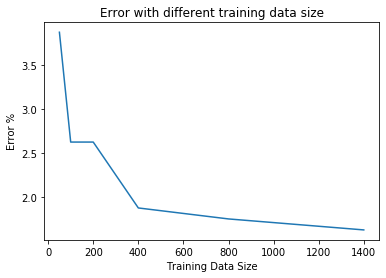

In [6]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('MATRIX.TEST')

dataMatrix_train1, tokenlist1, category_train1 = readMatrix('MATRIX.TRAIN.50')
dataMatrix_train2, tokenlist2, category_train2 = readMatrix('MATRIX.TRAIN.100')
dataMatrix_train3, tokenlist3, category_train3 = readMatrix('MATRIX.TRAIN.200')
dataMatrix_train4, tokenlist4, category_train4 = readMatrix('MATRIX.TRAIN.400')
dataMatrix_train5, tokenlist5, category_train5 = readMatrix('MATRIX.TRAIN.800')
dataMatrix_train6, tokenlist6, category_train6 = readMatrix('MATRIX.TRAIN.1400')


###########################################################################
# Train
state = nb_train(dataMatrix_train, category_train)

state1 = nb_train(dataMatrix_train1, category_train1)
state2 = nb_train(dataMatrix_train2, category_train2)
state3 = nb_train(dataMatrix_train3, category_train3)
state4 = nb_train(dataMatrix_train4, category_train4)
state5 = nb_train(dataMatrix_train5, category_train5)
state6 = nb_train(dataMatrix_train6, category_train6)


# Test and evluate
prediction = nb_test(dataMatrix_test, state)

prediction1 = nb_test(dataMatrix_test, state1)
prediction2 = nb_test(dataMatrix_test, state2)
prediction3 = nb_test(dataMatrix_test, state3)
prediction4 = nb_test(dataMatrix_test, state4)
prediction5 = nb_test(dataMatrix_test, state5)
prediction6 = nb_test(dataMatrix_test, state6)


# evaluate(prediction, category_test)
evaluate(prediction, category_test)

evaluate(prediction1, category_test)
evaluate(prediction2, category_test)
evaluate(prediction3, category_test)
evaluate(prediction4, category_test)
evaluate(prediction5, category_test)
evaluate(prediction6, category_test)


a = [3.8750, 2.6250,2.6250, 1.8750, 1.7500, 1.6250]
b = [50,100,200,400,800,1400]
plt.xlabel('Training Data Size')
plt.ylabel('Error %')
plt.plot(b,a )
plt.title('Error with different training data size')
plt.show()


In [4]:
state = nb_train(dataMatrix_train, category_train)
tokens = np.array(tokenlist)
tokens[np.argsort(state['phi_yeq1'] / state['phi_yeq0'])[::-1]][:10] #5 token

array(['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet', 'diploma',
       'dvd', 'websit', 'click', 'lowest'], dtype='<U16')